In [10]:
# Homework 6 Template
# G. Besla & R. Li

In [12]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass
import os

In [14]:
def OrbitCOM(galaxy,start,end,n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
        galaxy: The galaxy that we are collecting data on,
            this determines what data file will be read
        start: The first snapshot of the file that will be run
        end: The last snapshot of the file that will be run
        n: The interval of snapshots that will be written into the data file in the output
          
    outputs: 
        A data file that stores the position and velocity values of a galaxy as a function of time
    """
    # compose the filename for output
    fileout = f"orbit_{galaxy}.txt"
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    Delta = .1
    volDec = 2
    
    
    # for M33 that is stripped more, use different values for VolDec
    # sets different volDec value for M33 using an if statement
    if galaxy == 'M33':
        volDec = 4.0
    
    # generate the snapshot id sequence 
    snap_ids = np.arange(start,end,n)
    
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_ids),7])
    
    # a for loop 
    for i,snap_id in enumerate(snap_ids):
        # loop over files
        
        # compose the data filename (be careful about the folder)
        ilbl = '000' + str(snap_id)
        ilbl = ilbl[-3:]
        filename = "%s_"%(galaxy) + ilbl + '.txt'
        #uses if staements to assign the right data to each galaxy
        if galaxy == 'MW': 
            file = os.path.join("MW",filename)
        if galaxy == 'M31': 
            file = os.path.join("M31",filename)
        if galaxy == 'M33': 
            file = os.path.join("M33",filename)
        # Initialize an instance of CenterOfMass class, using disk particles
        COMp2 = CenterOfMass (file,2)
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COMpos = COMp2.COM_P(Delta,volDec)
        COMvel = COMp2.COM_V(COMpos[0],COMpos[1],COMpos[2])
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        orbit[i] = (COMp2.time.value,COMpos[0].value,COMpos[1].value,COMpos[2].value,COMvel[0].value,COMvel[1].value,COMvel[2].value)
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [16]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
OrbitCOM('MW',0,801,5)
OrbitCOM('M31',0,801,5)
OrbitCOM('M33',0,801,5)

In [17]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
dataMW = np.genfromtxt("orbit_MW.txt",dtype=None,names=True)
dataM31 = np.genfromtxt("orbit_M31.txt",dtype=None,names=True)
dataM33 = np.genfromtxt("orbit_M33.txt",dtype=None,names=True)

In [68]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit 

def dvectors(file1,file2):
    """
    This function loops over the datafiles for position and velocity vectors of two galaxies and creates 2
    lists that represents how the magnitudes of the distance and velocity between the two galaxies change over time
    Inputs:
        file1: the file containing the time, position, and velocity data for one of the galaxies
        file2: the file containing the time, position, and velocity data for the other galaxy

    Outputs:
        dis: A list containing the distance between two galaxies over time
        vel: A list containing the velcoity between two galaxies over time
    """
    dist = np.zeros(len(file1))
    vdist = np.zeros(len(file1))
    time = np.zeros(len(file1))
    for i in range(len(file1)):
        # Gathers position and velocity data for each point in time 
        x1 = file1[i][1]
        y1 = file1[i][2]
        z1 = file1[i][3]
        vx1 = file1[i][4]
        vy1 = file1[i][5]
        vz1 = file1[i][6]
        x2 = file2[i][1]
        y2 = file2[i][2]
        z2 = file2[i][3]
        vx2 = file2[i][4]
        vy2 = file2[i][5]
        vz2 = file2[i][6]
        t1 = file1[i][0] *1e-3
        # Computes the magnitudes of distance and velocity for each galaxy and stores them
        # as a data point on an array
        dist[i] = np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
        vdist[i] = np.sqrt((vx1-vx2)**2+(vy1-vy2)**2+(vz1-vz2)**2)
        time[i] = t1
        #converts arrays to lists
        tim = time.tolist()
        dis = dist.tolist()
        vel = vdist.tolist()
    return dis,vel,tim
        
        
        
    


In [70]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
MW31 = dvectors(dataMW,dataM31)
# of M33 and M31
M3133 = dvectors(dataM31,dataM33)
print(MW31[2])

[0.0, 0.071429, 0.142857, 0.214286, 0.285714, 0.357143, 0.42857100000000004, 0.5, 0.571429, 0.642857, 0.714286, 0.785714, 0.8571430000000001, 0.928571, 1.0, 1.0714290000000002, 1.142857, 1.214286, 1.285714, 1.357143, 1.428571, 1.5, 1.5714290000000002, 1.642857, 1.7142860000000002, 1.785714, 1.857143, 1.928571, 2.0, 2.071429, 2.1428570000000002, 2.214286, 2.285714, 2.357143, 2.428571, 2.5, 2.571429, 2.6428570000000002, 2.714286, 2.785714, 2.857143, 2.928571, 3.0, 3.071429, 3.1428570000000002, 3.214286, 3.285714, 3.357143, 3.428571, 3.5, 3.571429, 3.6428570000000002, 3.714286, 3.785714, 3.857143, 3.928571, 4.0, 4.071429, 4.142857, 4.214286, 4.2857140000000005, 4.357143, 4.428571, 4.5, 4.571429, 4.642857, 4.714286, 4.7857140000000005, 4.857143, 4.928571, 5.0, 5.071429, 5.142857, 5.214286, 5.2857140000000005, 5.357143, 5.428571, 5.5, 5.571429, 5.642857, 5.714286, 5.7857140000000005, 5.857143, 5.928571, 6.0, 6.071429, 6.142857, 6.214286, 6.2857140000000005, 6.357143, 6.428571, 6.5, 6.571429

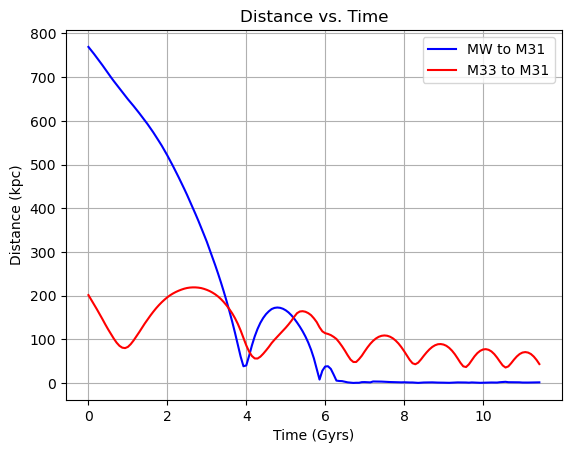

In [72]:
# Plot the Orbit of the galaxies 
#################################

distances1 = MW31[0]
distances2 = M3133[0]
time_1 = MW31[2]
time_2 = M3133[2]
plt.plot(time_1,distances1, linestyle='-', color='blue', label = 'MW to M31')
plt.plot(time_2,distances2, linestyle='-', color='red', label = 'M33 to M31')
#plt.semilogy(distances1, linestyle='-', color='blue', label = 'MW to M31')
#plt.semilogy(distances2, linestyle='-', color='red', label = 'M33 to M31')
# Labeling
plt.xlabel("Time (Gyrs)")
plt.ylabel("Distance (kpc)")
plt.title("Distance vs. Time")
#plt.ylim(0.1,50)
#plt.xlim(160*(5/12),160*(8/12))
plt.grid(True)
plt.legend()
plt.show()

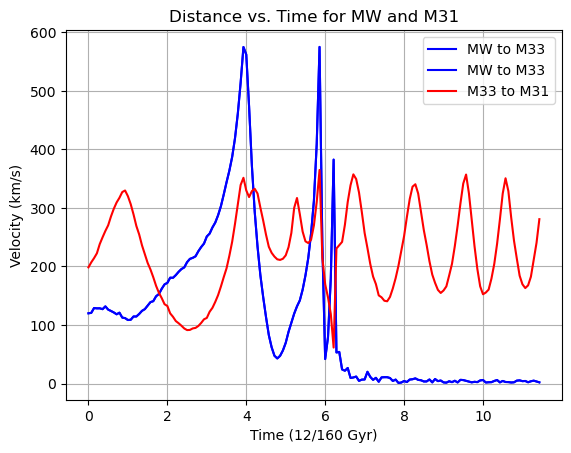

In [76]:
# Plot the orbital velocities of the galaxies 
#################################
velocities1 = MW31[1]
velocities2 = M3133[1]
plt.plot(time_1,velocities1, linestyle='-', color='blue', label = 'MW to M33')
plt.plot(time_1,velocities2, linestyle='-', color='red', label = 'M33 to M31')
#plt.semilogy(velocities1, linestyle='-', color='blue', label = 'MW to M33')
#plt.semilogy(velocities2, linestyle='-', color='red', label = 'M33 to M31')
# Labeling
plt.xlabel("Time (12/160 Gyr)")
plt.ylabel("Velocity (km/s)")
plt.title("Distance vs. Time for MW and M31")
#plt.ylim(0.1,50)
#plt.xlim(160*(5/12),160*(8/12))
plt.grid(True)
plt.legend()
plt.show()

In [70]:
# Question 1
# 3 close encounters, with the third being when they merge 

In [71]:
# Question 2
# As time increases, the separation and relative velocity between M31
# and MW both decrease
# The separation and relative velocities between M31 and M33 follow a similar evolution
# as time increases during and after the merger, although they are much more neat after the merger

In [72]:
# Question 3
# 92 * (12/160) Gyrs = 6.9 Gyrs
# M31 becomes a part of MW after they merge, so it doesn't have an orbit around MW